In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv")

# Display the first few rows
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [2]:
df.shape

(22029, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [4]:
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


In [5]:
df['Campaign_ID'].nunique()

22029

In [6]:
df['Location'].unique()
df['Customer_Segment'].unique()

array(['Tech Enthusiasts', 'Foodies', 'Fashionistas',
       'Outdoor Adventurers', 'Health & Wellness'], dtype=object)

In [7]:
df['Campaign_Type'].value_counts()

Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64

In [13]:
from collections import Counter

# Drop NaNs just in case
channels_clean = df['Channel_Used'].dropna()

# Split each entry by comma and strip extra spaces
split_channels = channels_clean.apply(lambda x: [ch.strip() for ch in x.split(',')])

# Flatten the list of lists into a single list
flattened = [ch for sublist in split_channels for ch in sublist]

# Count occurrences of each channel
channel_counts = Counter(flattened)

# Convert to DataFrame and sort
channel_df = pd.DataFrame(channel_counts.items(), columns=['Channel', 'Count'])
channel_df = channel_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

channel_df

,Channel,Count
0,Facebook,3742
1,Google Ads,3694
2,Website,3688
3,Instagram,3649
4,YouTube,3632
5,Email,3624


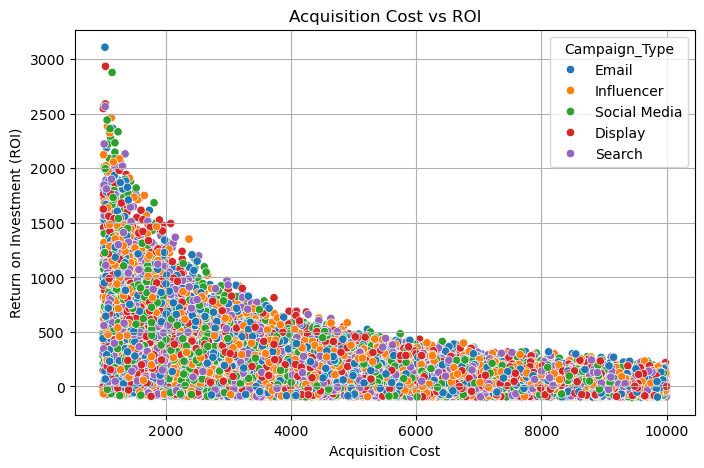

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Acquisition_Cost', y='ROI', hue='Campaign_Type')
plt.title('Acquisition Cost vs ROI')
plt.xlabel('Acquisition Cost')
plt.ylabel('Return on Investment (ROI)')
plt.grid(True)
plt.show()

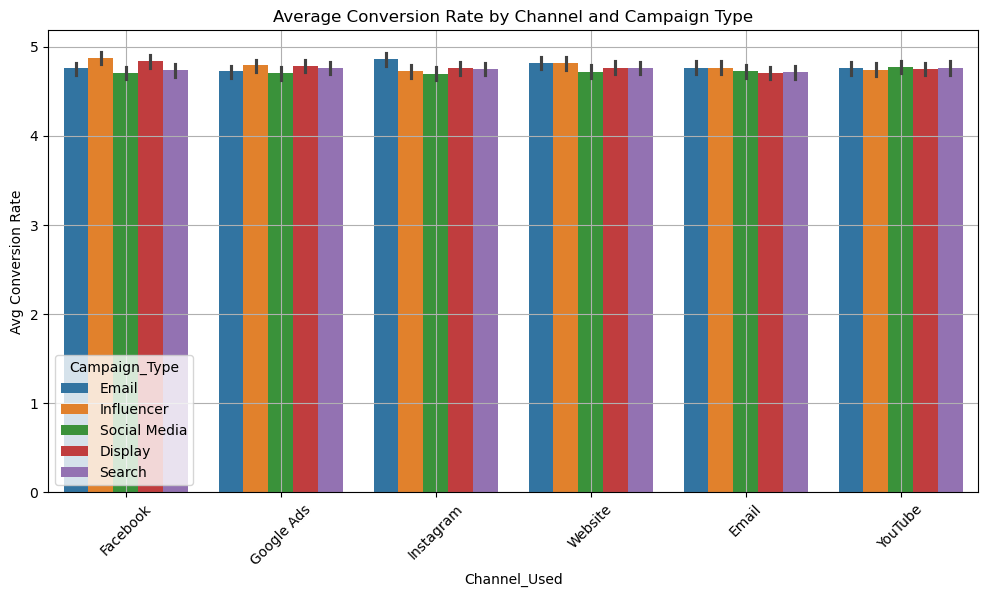

In [15]:
# Step 1: Create a copy with exploded channels
df_exploded = df.copy()
df_exploded['Channel_Used'] = df_exploded['Channel_Used'].dropna().apply(lambda x: [ch.strip() for ch in x.split(',')])
df_exploded = df_exploded.explode('Channel_Used')

# Step 2: Group and plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_exploded, x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', estimator='mean')
plt.title('Average Conversion Rate by Channel and Campaign Type')
plt.ylabel('Avg Conversion Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

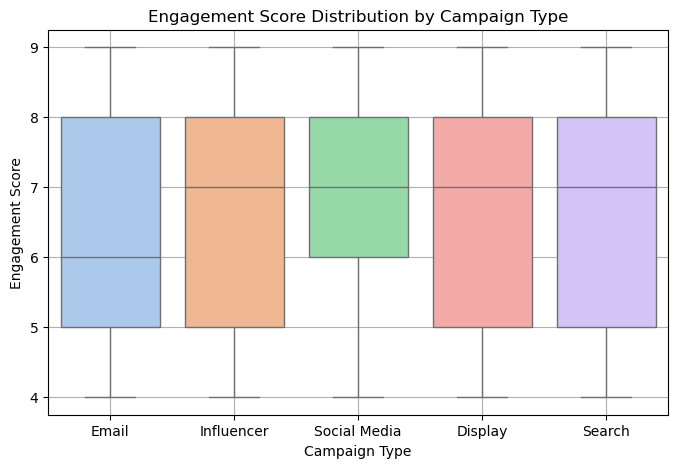

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Campaign_Type', y='Engagement_Score', hue='Campaign_Type', palette='pastel', dodge=False)
plt.title('Engagement Score Distribution by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.legend([],[], frameon=False)  # Remove duplicate legend
plt.show()

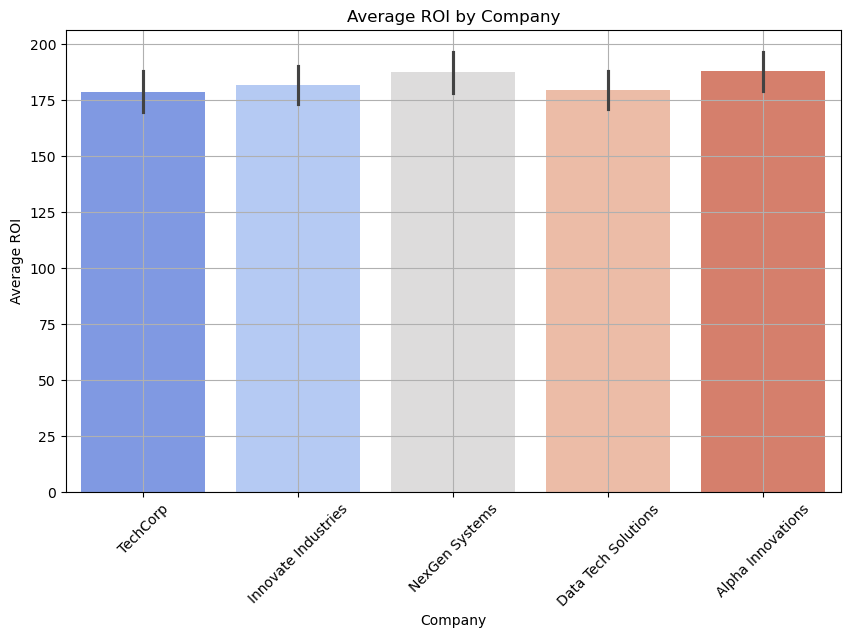

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Company', y='ROI', hue='Company', estimator='mean', palette='coolwarm', dodge=False)
plt.title('Average ROI by Company')
plt.xlabel('Company')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend([], [], frameon=False)  # Hide the legend (it's same as x-axis)
plt.show()

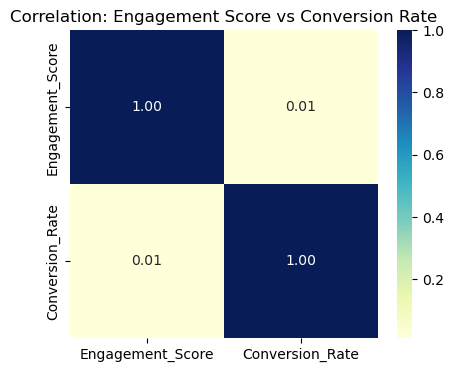

In [21]:
plt.figure(figsize=(5, 4))

# Correlation matrix for selected columns
correlation_data = df[['Engagement_Score', 'Conversion_Rate']].corr()

# Plot the heatmap
sns.heatmap(correlation_data, annot=True, cmap='YlGnBu', fmt='.2f', square=True)
plt.title('Correlation: Engagement Score vs Conversion Rate')
plt.show()

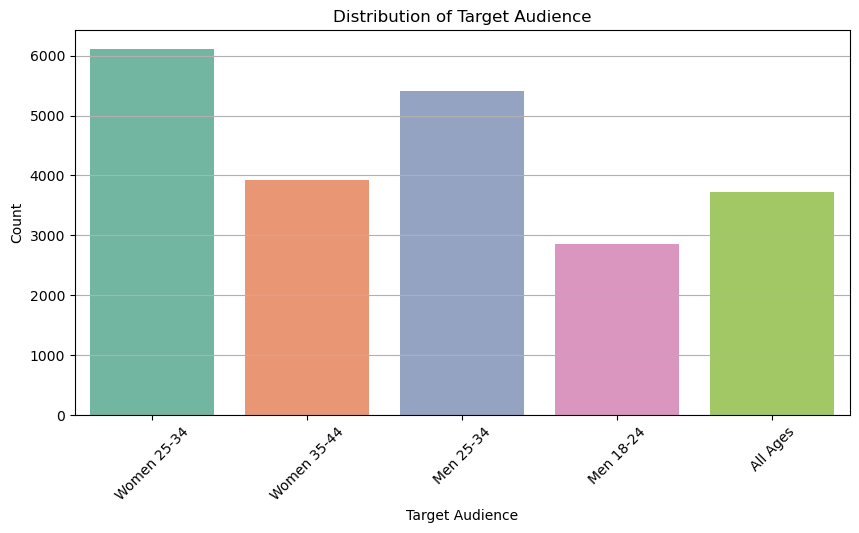

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Target_Audience', hue='Target_Audience', palette='Set2', dodge=False)
plt.title('Distribution of Target Audience')
plt.xlabel('Target Audience')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend([], [], frameon=False)  # Hide legend since it's redundant
plt.show()

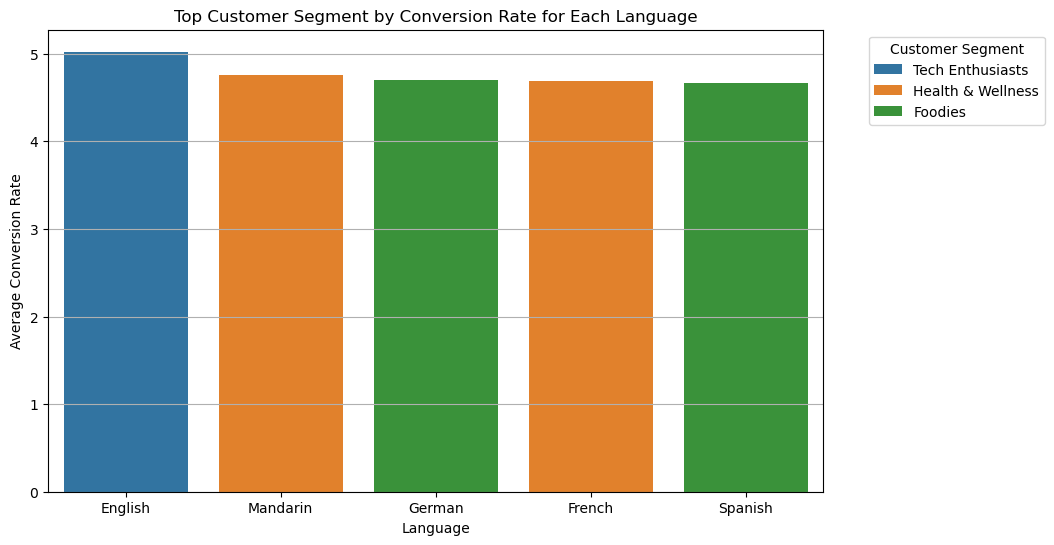

In [24]:
# Step 1: Group by Language and Customer_Segment, then get average Conversion Rate
grouped = df.groupby(['Language', 'Customer_Segment'])['Conversion_Rate'].mean().reset_index()

# Step 2: Find the segment with the highest Conversion Rate per language
top_segments = grouped.sort_values('Conversion_Rate', ascending=False).groupby('Language').head(1)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_segments, x='Language', y='Conversion_Rate', hue='Customer_Segment', dodge=False)
plt.title('Top Customer Segment by Conversion Rate for Each Language')
plt.ylabel('Average Conversion Rate')
plt.grid(axis='y')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

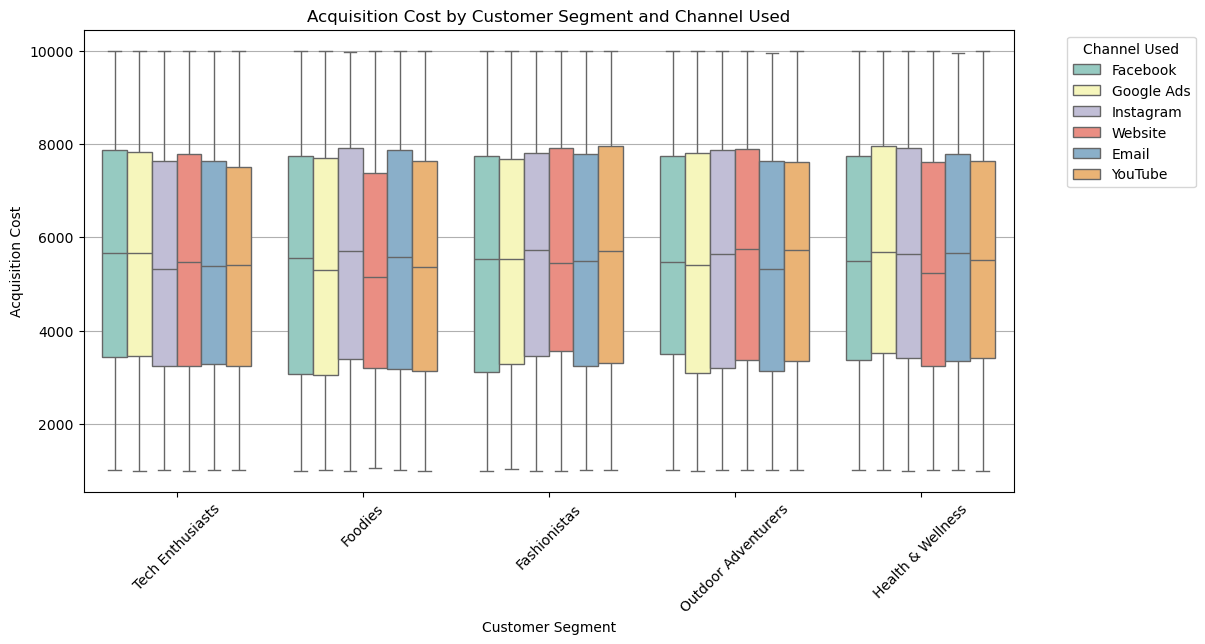

In [25]:
# Step 1: Explode the Channel_Used column
df_exploded = df.copy()
df_exploded['Channel_Used'] = df_exploded['Channel_Used'].dropna().apply(lambda x: [ch.strip() for ch in x.split(',')])
df_exploded = df_exploded.explode('Channel_Used')

# Step 2: Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exploded, x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used', palette='Set3')
plt.title('Acquisition Cost by Customer Segment and Channel Used')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Channel Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

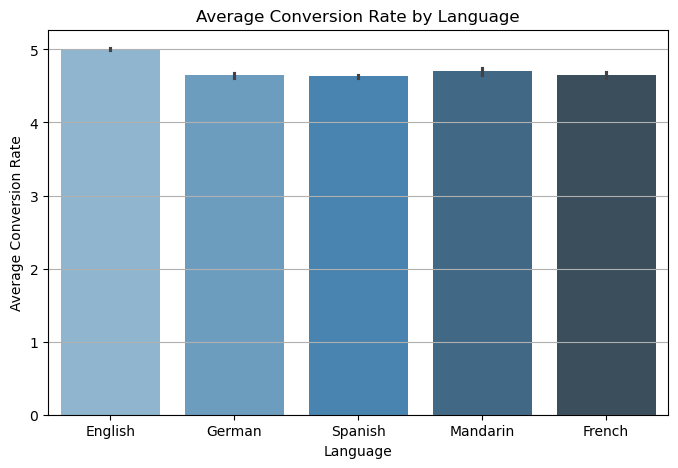

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Language', y='Conversion_Rate', hue='Language', palette='Blues_d', dodge=False)
plt.title('Average Conversion Rate by Language')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.grid(axis='y')
plt.legend([], [], frameon=False)  # Hide legend since it's the same as x-axis
plt.show()

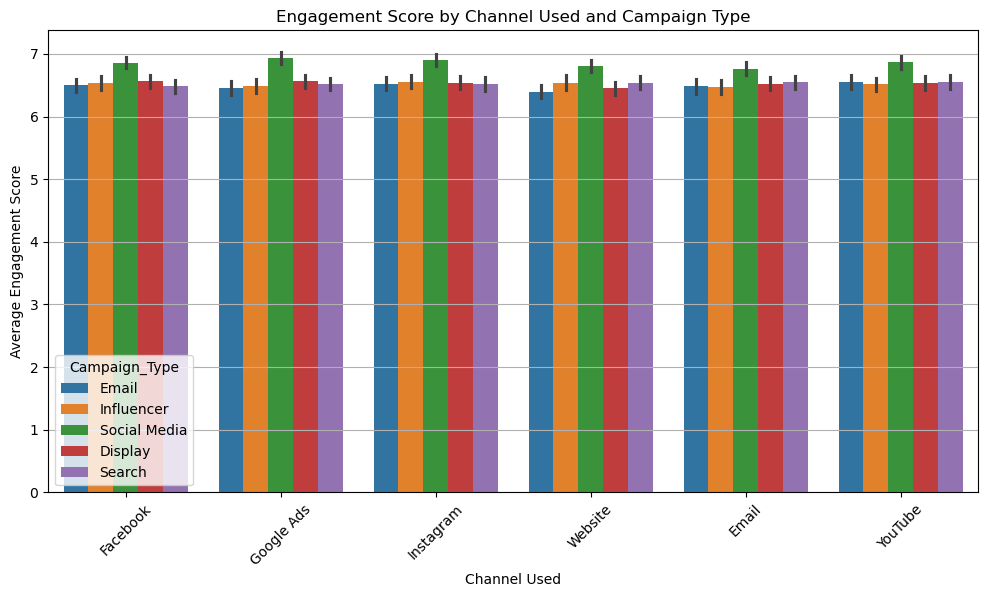

In [28]:
# Explode Channel_Used if not done already
df_exploded = df.copy()
df_exploded['Channel_Used'] = df_exploded['Channel_Used'].dropna().apply(lambda x: [ch.strip() for ch in x.split(',')])
df_exploded = df_exploded.explode('Channel_Used')

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_exploded, x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', estimator='mean')
plt.title('Engagement Score by Channel Used and Campaign Type')
plt.xlabel('Channel Used')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

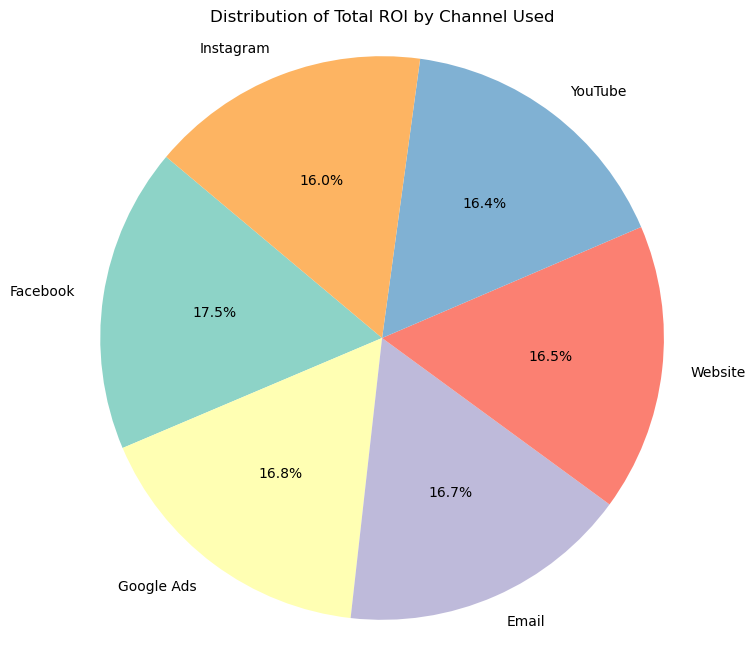

In [29]:
# Group by Channel_Used and sum ROI
roi_by_channel = df_exploded.groupby('Channel_Used')['ROI'].sum().sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(roi_by_channel, labels=roi_by_channel.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Total ROI by Channel Used')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

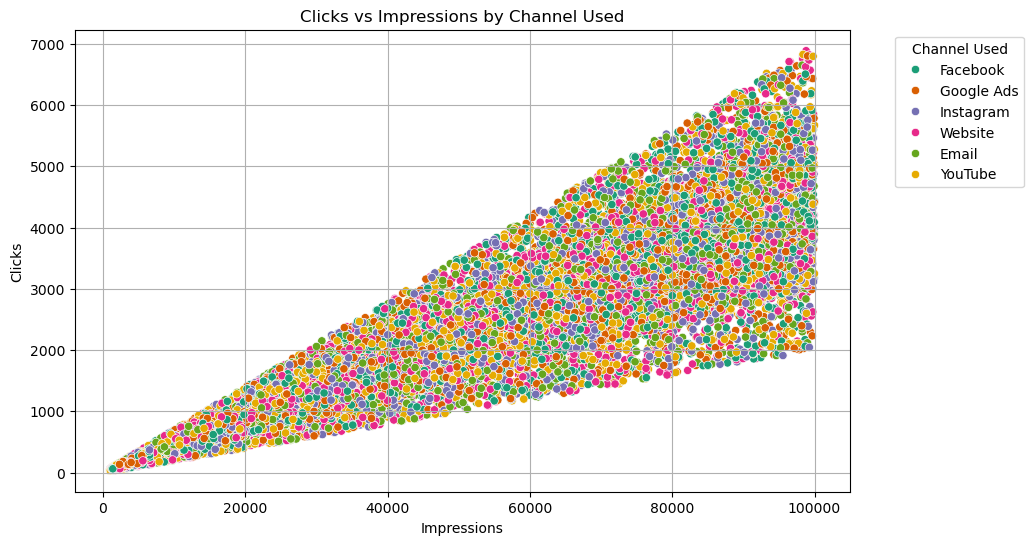

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_exploded, x='Impressions', y='Clicks', hue='Channel_Used', palette='Dark2')
plt.title('Clicks vs Impressions by Channel Used')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.grid(True)
plt.legend(title='Channel Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

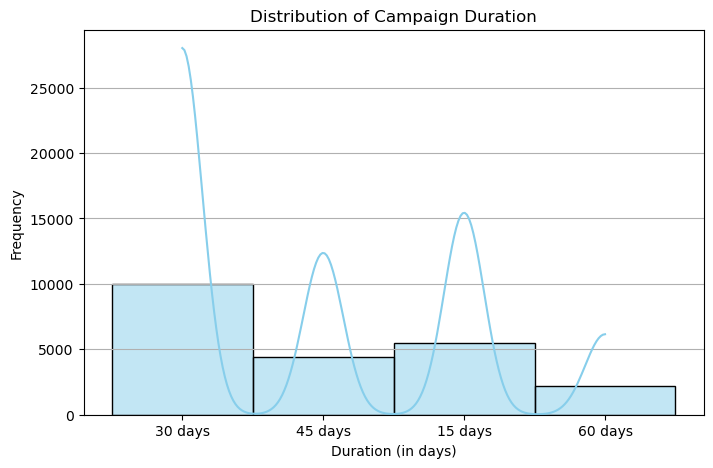

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Duration', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Campaign Duration')
plt.xlabel('Duration (in days)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

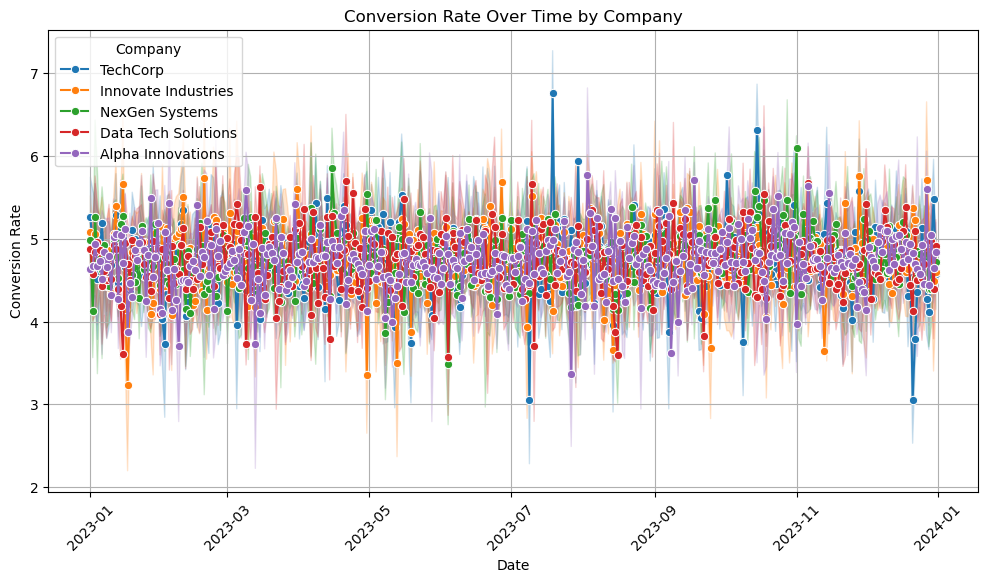

In [34]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Line chart of Conversion Rate over time, separated by Company
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Conversion_Rate', hue='Company', marker='o')
plt.title('Conversion Rate Over Time by Company')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

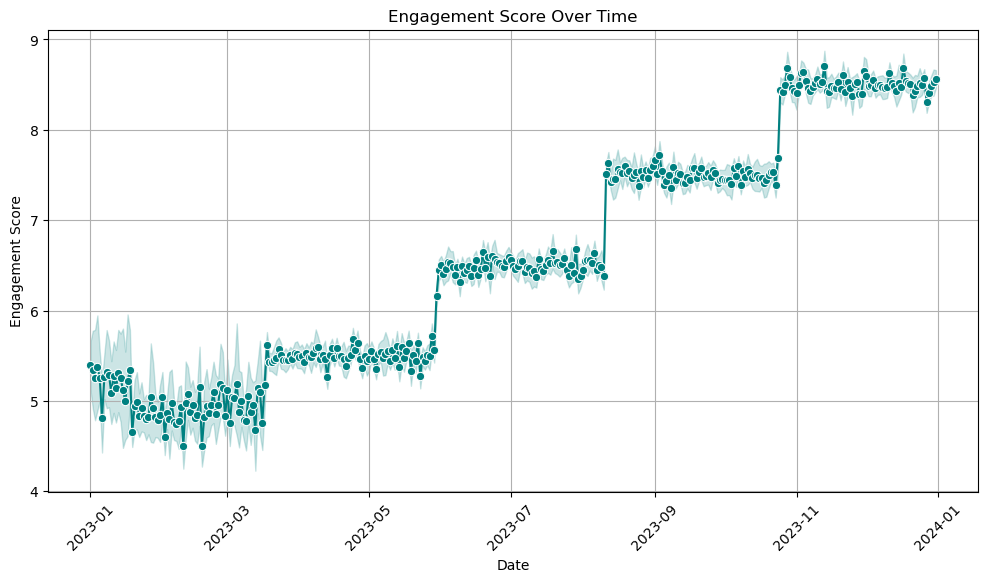

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Engagement_Score', marker='o', color='teal')
plt.title('Engagement Score Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()